# Данные: Аварии_Причины_САЦ_2020

## Чтение данных

In [ ]:
! gdown --id 1iRqT8zTQfXk2YJptha1pXiIV_QUTw-Rs
! gdown --id 1UpkyV4pn85qH9E31CpFJ43NNpoqJZPoL

Downloading...
From: https://drive.google.com/uc?id=1iRqT8zTQfXk2YJptha1pXiIV_QUTw-Rs
To: /content/___________________2020.xlsx
100% 202k/202k [00:00<00:00, 59.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UpkyV4pn85qH9E31CpFJ43NNpoqJZPoL
To: /content/__________________2020.xlsx
100% 20.9k/20.9k [00:00<00:00, 17.9MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/___________________2020.xlsx')
df1 = pd.read_excel('/content/__________________2020.xlsx')
df.head()

Дата (местное время)  ...                                     Причина
0  2020-01-01 04:02:00  ...                           Ветровые нагрузки
1  2020-09-23 00:38:00  ...  Термическое повреждение, перегрев, пережог
2  2020-01-01 04:38:00  ...                           Ветровые нагрузки
3  2020-10-06 06:46:00  ...  Термическое повреждение, перегрев, пережог
4  2020-11-15 16:54:00  ...  Термическое повреждение, перегрев, пережог

[5 rows x 3 columns]

In [ ]:
df1.head()

Дата  ... Тип объекта
0 2020-01-03  ...         ЛЭП
1 2020-01-10  ...         ЛЭП
2 2020-01-12  ...         ЛЭП
3 2020-01-29  ...         ЛЭП
4 2020-02-02  ...         ЛЭП

[5 rows x 5 columns]

In [ ]:
df.isna().mean()

Дата (местное время)    0.0
Субъект РФ2             0.0
Причина                 0.0
dtype: float64

In [ ]:
df1.isna().mean()

Дата           0.0
Субъект РФ     0.0
Причина        0.0
Подробности    0.0
Тип объекта    0.0
dtype: float64

## Анализ

In [ ]:
count_city = (df.groupby(['Субъект РФ2'])
[['Субъект РФ2']]
 .agg(['count']))
count_city.to_excel("Count_city.xlsx")

In [ ]:
count_city

Субъект РФ2
                                      count
Субъект РФ2                                
Автономная Республика Крым               58
Алтайский край                          312
Амурская область                        179
Архангельская область                    53
Астраханская область                     46
...                                     ...
Чувашская Республика - Чувашия           25
Ямало-Ненецкий автономный округ          93
Ярославская область                      31
г. Москва                                18
г. Санкт-Петербург                       32

[79 rows x 1 columns]

Количество различных ЧП

In [ ]:
count_chp = (df.groupby(['Причина'])[['Причина']].agg(['count']))
count_chp

Причина
                                                     count
Причина                                                   
Атмосферные перенапряжения (гроза)                    2566
Ветровые нагрузки                                      996
Взрыв, загорание, пожар                                 62
Воздействие животных и птиц                           2265
Воздействие повторяющихся стихийных явлений              1
Гололедно-изморозевые отложения                        167
Природные пожары                                        79
Прочие воздействия неблагоприятных природных яв...     930
Разрушение фундамента, строительных конструкций...       9
Термическое повреждение, перегрев, пережог             314

Смотрим количество различных причин ЧП в каждом городе.

In [ ]:
Count_prichin = (df.groupby(['Субъект РФ2', 'Причина'])
[['Причина']]
 .agg(['count']))
Count_prichin.to_excel("Count_prichin.xlsx")

In [ ]:
Count_prichin

Причина
                                                                                count
Субъект РФ2                Причина                                                   
Автономная Республика Крым Атмосферные перенапряжения (гроза)                      21
                           Ветровые нагрузки                                        4
                           Воздействие животных и птиц                             27
                           Прочие воздействия неблагоприятных природных яв...       5
                           Термическое повреждение, перегрев, пережог               1
...                                                                               ...
г. Санкт-Петербург         Атмосферные перенапряжения (гроза)                       3
                           Ветровые нагрузки                                        7
                           Воздействие животных и птиц                              8
                           Прочие воздействия неблагоприятных природных яв...       5
                           Термическое повреждение, перегрев, пережог               9

[465 rows x 1 columns]

Определяем сезон по дате

In [ ]:
df['date_offset'] = (df['Дата (местное время)'].dt.month*100 + df['Дата (местное время)'].dt.day - 320)%1300
df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['Весна', 'Лето', 'Осень', 'Зима'])
df.head()

Дата (местное время)          Субъект РФ2  ... date_offset  season
0  2020-01-01 04:02:00  Республика Марий Эл  ...        1081    Зима
1  2020-09-23 00:38:00      Приморский край  ...         603   Осень
2  2020-01-01 04:38:00     Хабаровский край  ...        1081    Зима
3  2020-10-06 06:46:00            г. Москва  ...         686   Осень
4  2020-11-15 16:54:00   Московская область  ...         795   Осень

[5 rows x 5 columns]

Смотрим как распределяются различные причины ЧП по сезонам

In [ ]:
count_season = (df.groupby(['Субъект РФ2', 'Причина', 'season'])
[['Причина']]
 .agg(['count']))
count_season.to_excel("count_season.xlsx")

In [ ]:
count_season

Причина
                                                                                       count
Субъект РФ2                Причина                                            season        
Автономная Республика Крым Атмосферные перенапряжения (гроза)                 Весна        5
                                                                              Лето        13
                                                                              Осень        2
                                                                              Зима         1
                           Ветровые нагрузки                                  Весна        0
...                                                                                      ...
г. Санкт-Петербург         Разрушение фундамента, строительных конструкций... Зима         0
                           Термическое повреждение, перегрев, пережог         Весна        4
                                                                              Лето         1
                                                                              Осень        2
                                                                              Зима         2

[3160 rows x 1 columns]

Количество ЧП в разные сезоны

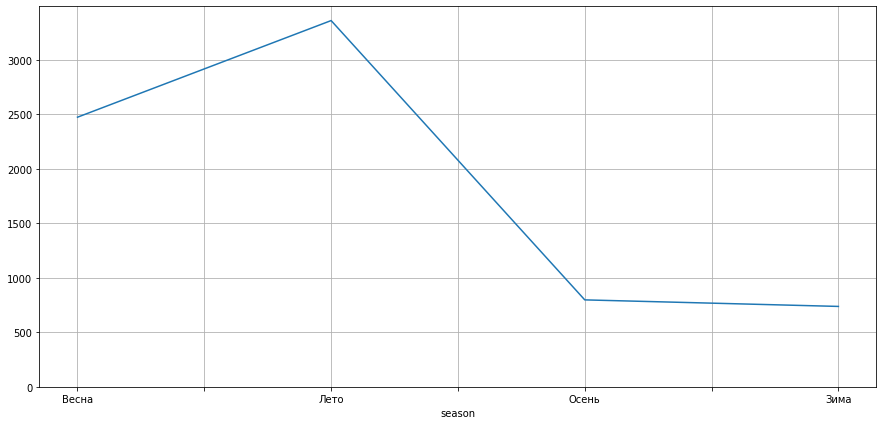

In [ ]:
df.groupby('season')['Причина'].count().plot(figsize=(15, 7), rot=0, ylim=0, grid=True)

В холодные месяца ЧП в более чем два раза меньше.

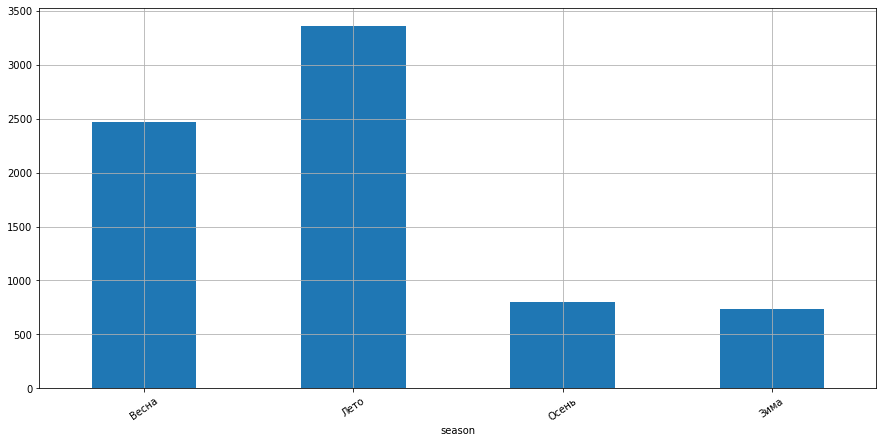

In [ ]:
df.groupby('season')['Причина'].count().plot(figsize=(15, 7), rot=35, ylim=0, grid=True, kind='bar')

Какие ЧП в каждый сезон

In [ ]:
(df.groupby(['season', 'Причина'])
[['Причина']]
 .agg(['count']))

Причина
                                                            count
season Причина                                                   
Весна  Атмосферные перенапряжения (гроза)                     793
       Ветровые нагрузки                                      355
       Взрыв, загорание, пожар                                 28
       Воздействие животных и птиц                            877
       Воздействие повторяющихся стихийных явлений              0
       Гололедно-изморозевые отложения                         14
       Природные пожары                                        39
       Прочие воздействия неблагоприятных природных яв...     271
       Разрушение фундамента, строительных конструкций...       3
       Термическое повреждение, перегрев, пережог              92
Лето   Атмосферные перенапряжения (гроза)                    1726
       Ветровые нагрузки                                      288
       Взрыв, загорание, пожар                                 22
       Воздействие животных и птиц                            897
       Воздействие повторяющихся стихийных явлений              0
       Гололедно-изморозевые отложения                          1
       Природные пожары                                        28
       Прочие воздействия неблагоприятных природных яв...     303
       Разрушение фундамента, строительных конструкций...       2
       Термическое повреждение, перегрев, пережог              91
Осень  Атмосферные перенапряжения (гроза)                      38
       Ветровые нагрузки                                      144
       Взрыв, загорание, пожар                                  9
       Воздействие животных и птиц                            283
       Воздействие повторяющихся стихийных явлений              0
       Гололедно-изморозевые отложения                         51
       Природные пожары                                         7
       Прочие воздействия неблагоприятных природных яв...     203
       Разрушение фундамента, строительных конструкций...       1
       Термическое повреждение, перегрев, пережог              61
Зима   Атмосферные перенапряжения (гроза)                       9
       Ветровые нагрузки                                      206
       Взрыв, загорание, пожар                                  3
       Воздействие животных и птиц                            195
       Воздействие повторяющихся стихийных явлений              1
       Гололедно-изморозевые отложения                         97
       Природные пожары                                         4
       Прочие воздействия неблагоприятных природных яв...     149
       Разрушение фундамента, строительных конструкций...       3
       Термическое повреждение, перегрев, пережог              70

In [ ]:
season_prichina_count = (df.groupby(['season'])
[['Причина']]
 .agg(['count']))
season_prichina_count

Причина
         count
season        
Весна     2472
Лето      3358
Осень      797
Зима       737

## Смотрим второй датафрейм с данными: Аварии_погода_САЦ_2020

In [ ]:
df1.head()

Дата  ... Тип объекта
0 2020-01-03  ...         ЛЭП
1 2020-01-10  ...         ЛЭП
2 2020-01-12  ...         ЛЭП
3 2020-01-29  ...         ЛЭП
4 2020-02-02  ...         ЛЭП

[5 rows x 5 columns]

В субъекты РФ попала запись с датой, дальше она будет удалена  
вот эта -> 2020-05-26 00:00:00


In [ ]:
df1 = df1.drop(index=[88])
df1

Дата  ...                    Тип объекта
0   2020-01-03  ...                            ЛЭП
1   2020-01-10  ...                            ЛЭП
2   2020-01-12  ...                            ЛЭП
3   2020-01-29  ...                            ЛЭП
4   2020-02-02  ...                            ЛЭП
..         ...  ...                            ...
221 2020-12-24  ...  Повреждения нескольких ЛЭП\ПС
222 2020-12-31  ...                            ЛЭП
223 2020-12-31  ...                            ЛЭП
224 2020-12-31  ...                            ЛЭП
225 2020-12-31  ...                            ЛЭП

[225 rows x 5 columns]

Смотрим типы объектов и причины их повреждения

In [ ]:
Type_object = (df1.groupby(['Тип объекта', 'Причина'])
[['Тип объекта']]
 .agg(['count']))
Type_object

Тип объекта
                                                                 count
Тип объекта                   Причина                                 
ГЭС                           Пожары                                 2
Газопровод                    Паводок                                1
ЛЭП                           Гололёдообразование                    9
                              Паводок                                1
                              Падение деревьев (природные)          64
                              Пожары                                95
ПС, ЛЭП                       Паводок                                1
                              Пожары                                 7
Повреждения нескольких ЛЭП\ПС Погодные явления                      41
Подстанция                    Паводок                                3
ЭС, ЛЭП                       Паводок                                1

Смотрим наиболее частые причины ЧП

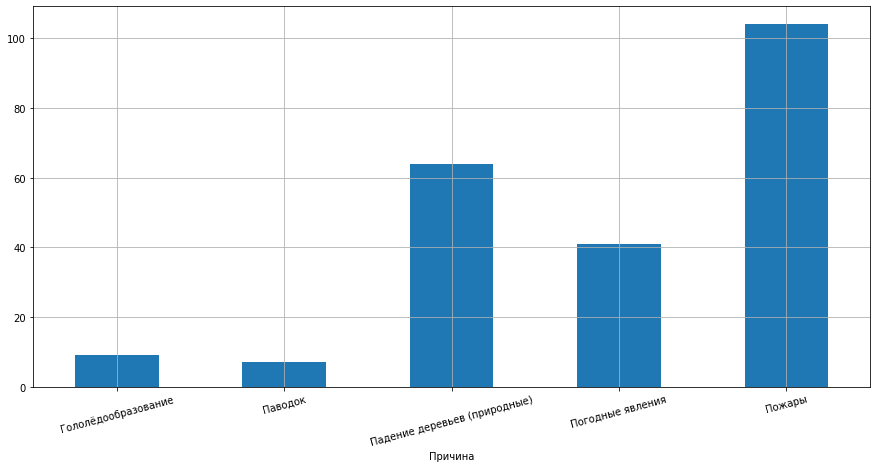

In [ ]:
df1.groupby('Причина')['Субъект РФ'].count().plot(figsize=(15, 7), rot=15, ylim=0, grid=True, kind='bar')

Количество ЧП в каждом городе

In [ ]:
(df1.groupby(['Субъект РФ'])
[['Причина']]
 .agg(['count']))

Причина
                                 count
Субъект РФ                            
Алтайский край                       2
Алтайский край, Казахстан            1
Амурская область                     3
Архангельская область                1
Астраханская область                 3
...                                ...
Челябинская область                  1
Челябинская область, Казахстан       1
Чеченская Республика                 7
Чукотский автономный округ           1
Ярославская область                  1

[76 rows x 1 columns]

Количество ЧП на каждом типе объекта

In [ ]:
(df1.groupby(['Тип объекта'])
[['Причина']]
 .agg(['count']))

Причина
                                count
Тип объекта                          
ГЭС                                 2
Газопровод                          1
ЛЭП                               169
ПС, ЛЭП                             8
Повреждения нескольких ЛЭП\ПС      41
Подстанция                          3
ЭС, ЛЭП                             1